# CRISP-DM en Minería de Datos

- [Comprensión del negocio](crisp-dm/01-compreder-el-negocio.md)
- [Conocimiento de los datos](crisp-dm/02-conocimiento-de-los-datos.md)


### 2.6 - Registros por año


<p><small>Observamos un sesgo marcado en el primer año (2008) por lo que, suponemos que las estaciones meteorológicas para medición de clima eran menos en australia en comparción con los otros años donde  el histograma refleja mayor cantidad de datos:</small></p>

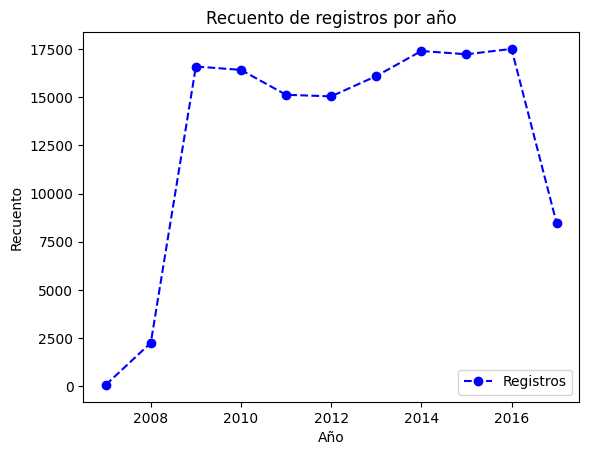

In [8]:

# 1- transformamos la característica 'Date' a datetime usando el método to_datetime de la librería pandas
df['Date'] = pd.to_datetime(df['Date'])
# 2- importamos librería para graficos
import matplotlib.pyplot as plt
# 3- creamos variable, asignamos cantidad de registros por año y ordenamos
cantidad_por_años = df['Date'].dt.year.value_counts().sort_index()
# 4- asignamos a gráfico
#cantidad_por_años.plot(kind='bar')
ax  = cantidad_por_años.plot(marker='o', linestyle='--', color='b', label='Registros')
# 5- personalizamos metadatos del grafico
plt.title('Recuento de registros por año')
plt.xlabel('Año')
plt.ylabel('Recuento')
#plt.xticks(rotation=80)
#plt.yticks([2500,1000,15000,17000])
plt.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (12, 6)
# 6- mostramos
plt.show()



### 2.7 - Registros por Ubicación (Location)


<small>Separamos las localizaciones en 2 grupos.

|Grupo|Tipo de ubicación|
|--|--|
|1|Costera|
|2|No Costera|

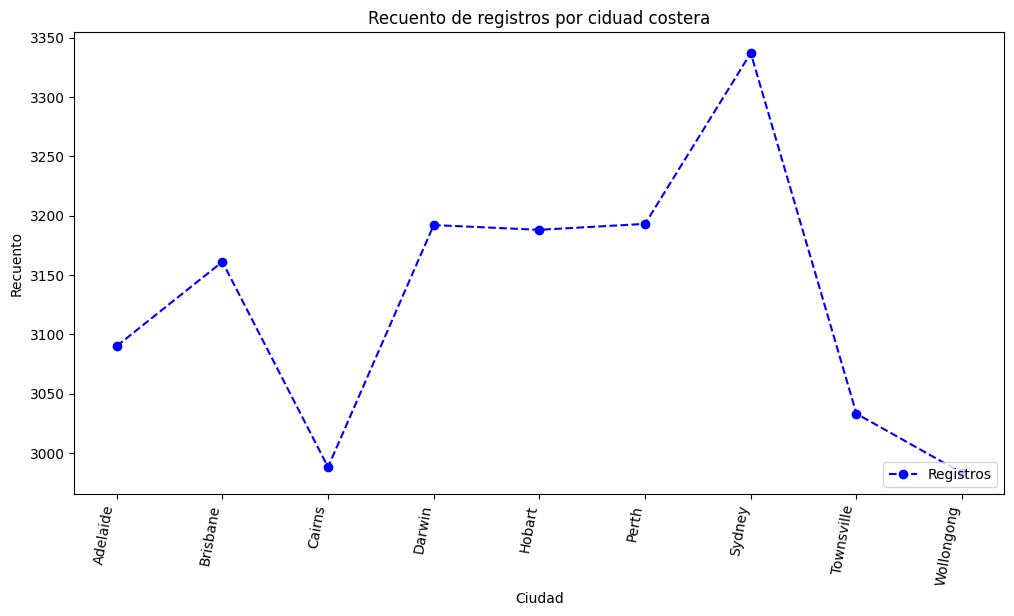

In [9]:
## Grupo 1

# 1- creamos el grupo
grupo01 = df[df['Location'].isin(['Adelaide', 'Cairns', 'Brisbane', 'Gold Coast', 'Hobart', 'Darwin', 'Perth', 'Townsville', 'Sydney', 'Fremantle', 'Wollongong'])]
# 2- importamos librería para graficos
import matplotlib.pyplot as plt
# 3- creamos variable, asignamos cantidad de registros por año y ordenamos
cantidad_grupo01= grupo01['Location'].value_counts().sort_index()
# 4- asignamos a gráfico
#cantidad_grupo02.plot(kind='bar')
ax = cantidad_grupo01.plot(marker='o', color='b', linestyle='--', label='Registros')
# 5- personalizamos metadatos del grafico
plt.title('Recuento de registros por ciduad costera')
plt.xlabel('Ciudad')
plt.ylabel('Recuento')
plt.xticks(rotation=80)
plt.legend(loc='lower right')
ax.set_xticks(range(len(cantidad_grupo01)))
ax.set_xticklabels(cantidad_grupo01.index, rotation=80, ha='right')
plt.rcParams["figure.figsize"] = (12, 6)
# 6- mostramos
plt.show()



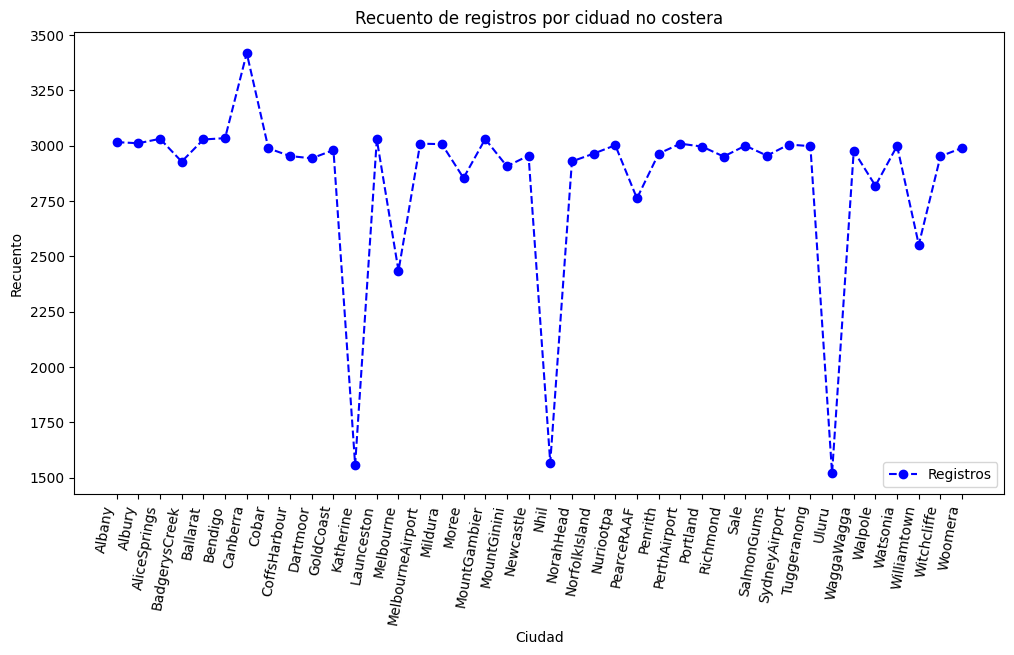

In [10]:
## Grupo 2

grupo02 = df[~df['Location'].isin(['Adelaide', 'Cairns', 'Brisbane', 'Gold Coast', 'Hobart', 'Darwin', 'Perth', 'Townsville', 'Sydney', 'Fremantle', 'Wollongong'])]
#grupo02['Location'].unique()
# 2- importamos librería para graficos
import matplotlib.pyplot as plt
# 3- creamos variable, asignamos cantidad de registros por año y ordenamos
cantidad_grupo02 = grupo02['Location'].value_counts().sort_index()
# 4- asignamos a gráfico
#cantidad_grupo02.plot(kind='bar')
ax = cantidad_grupo02.plot(marker='o', color='b', linestyle='--', label='Registros')
# 5- personalizamos metadatos del grafico
plt.title('Recuento de registros por ciduad no costera')
plt.xlabel('Ciudad')
plt.ylabel('Recuento')
#plt.xticks(rotation=80)
plt.legend(loc='lower right')
ax.set_xticks(range(len(cantidad_grupo02)))
ax.set_xticklabels(cantidad_grupo02.index, rotation=80, ha='right')
plt.rcParams["figure.figsize"] = (12, 6)
# 6- mostramos
plt.show()

### 2.8 - boxplot para registros por grupo de ubicaciones



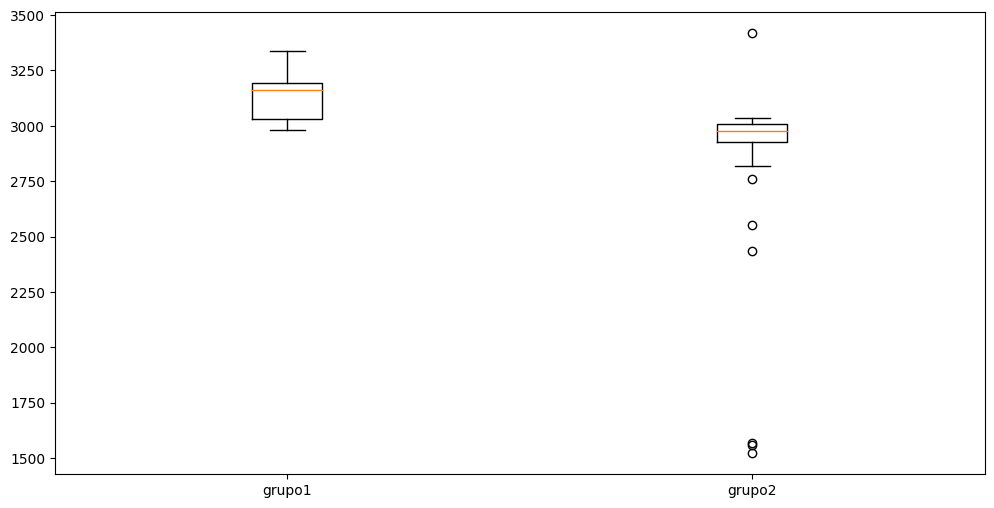

In [11]:

plt.boxplot([cantidad_grupo01,cantidad_grupo02],labels=['grupo1','grupo2'])
plt.show()


### 2.9 - subplot


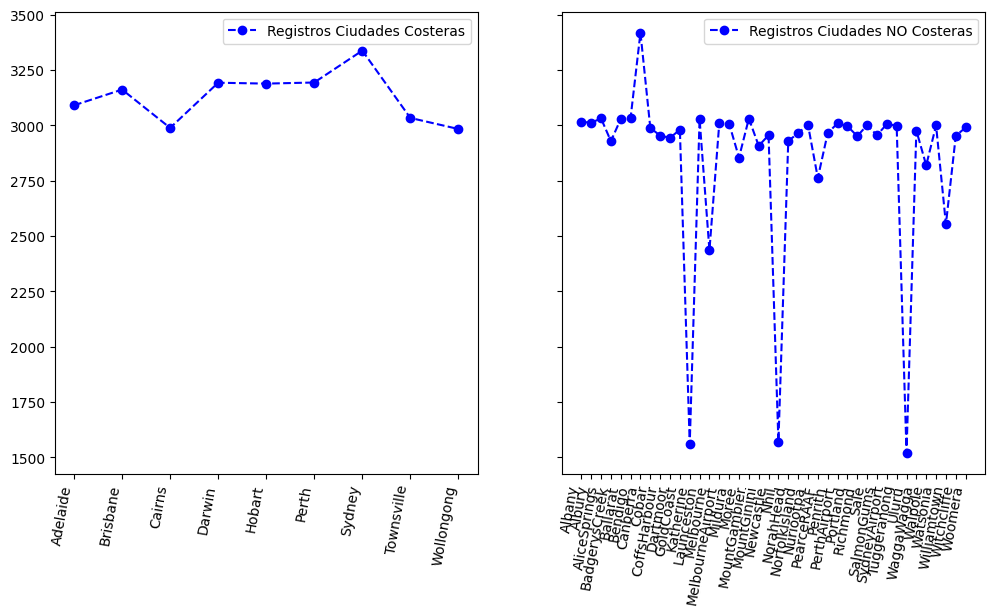

In [12]:

fig, ax = plt.subplots(1,2, sharey=True)
# grupo 01 (ciudades costeras)
ax[0].plot(cantidad_grupo01, color='b', marker='o',  linestyle='--', label='Registros Ciudades Costeras')
ax[0].set_xticks(range(len(cantidad_grupo01)))
ax[0].set_xticklabels(cantidad_grupo01.index, rotation=80, ha='right')
ax[0].legend(loc='upper right')

# grupo 02 (ciudades no costeras)
ax[1].plot(cantidad_grupo02, color='b',  marker='o',  linestyle='--', label='Registros Ciudades NO Costeras')
ax[1].set_xticks(range(len(cantidad_grupo02)))
ax[1].set_xticklabels(cantidad_grupo02.index, rotation=80, ha='right')
ax[1].legend(loc='upper right')
plt.rcParams["figure.figsize"] = (16, 6)
plt.show()



### 2.10 matriz de correlación



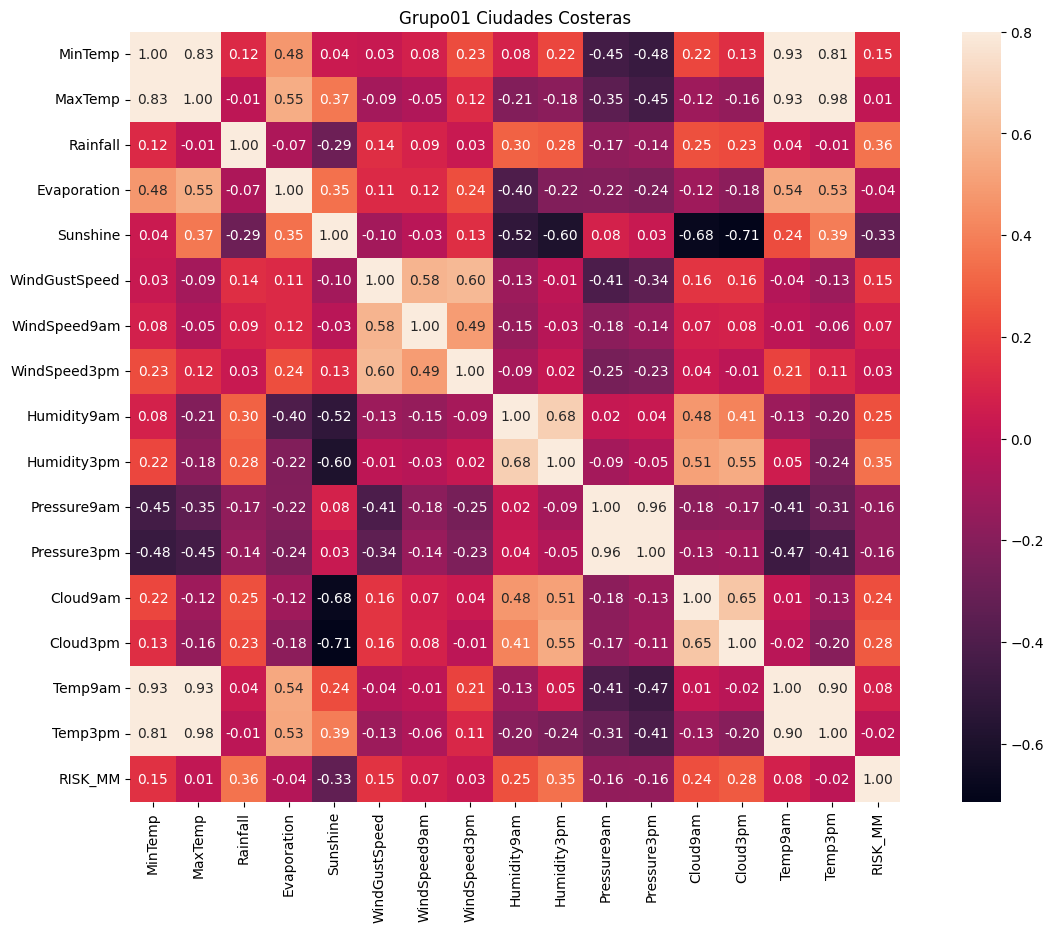

In [13]:
# Grupo 01 (Ciudades Costeras)
## consideramos solo las variables numéricas
import seaborn as sns
dfx = grupo01[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']]
corrmat = dfx.corr()
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f');
plt.title("Grupo01 Ciudades Costeras")
plt.show()


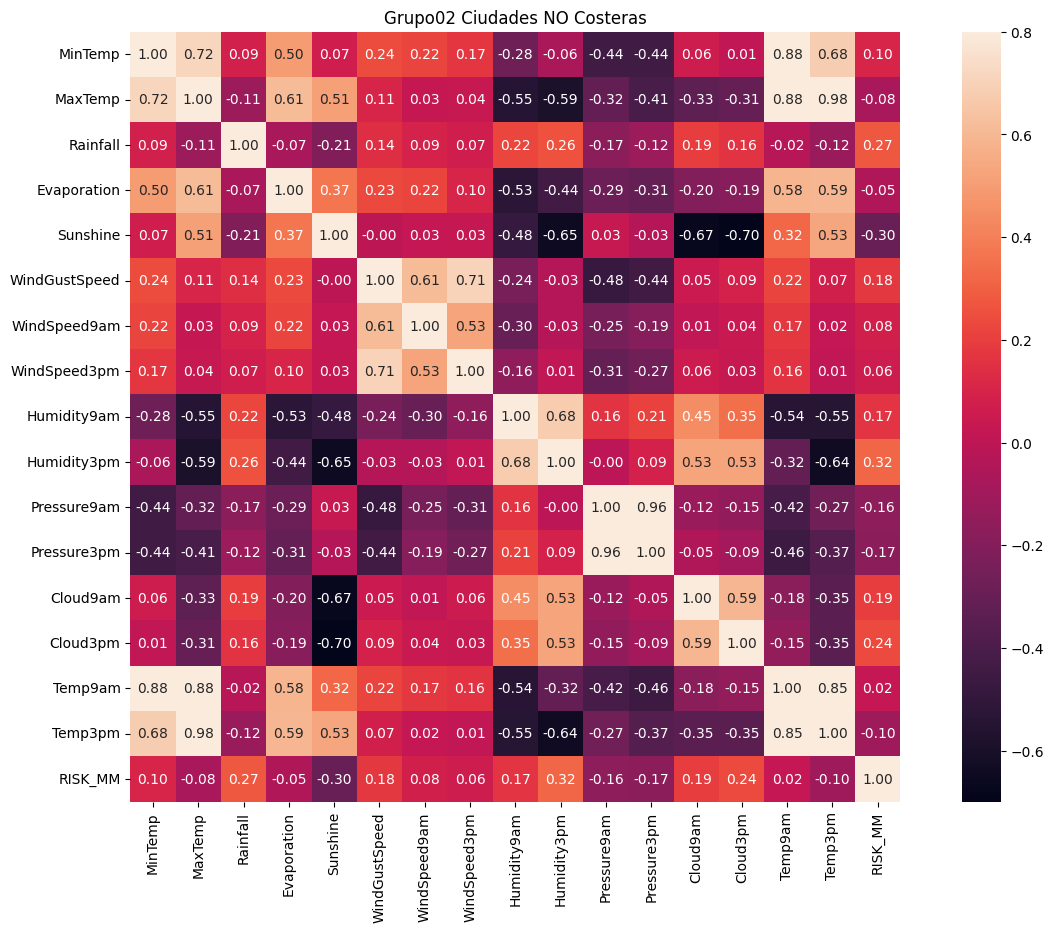

In [14]:
# Grupo 02 (Ciudades NO Costeras)
## consideramos solo las variables numéricas
import seaborn as sns
dfx = grupo02[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']]
corrmat = dfx.corr()
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f');
plt.title("Grupo02 Ciudades NO Costeras")
plt.show()

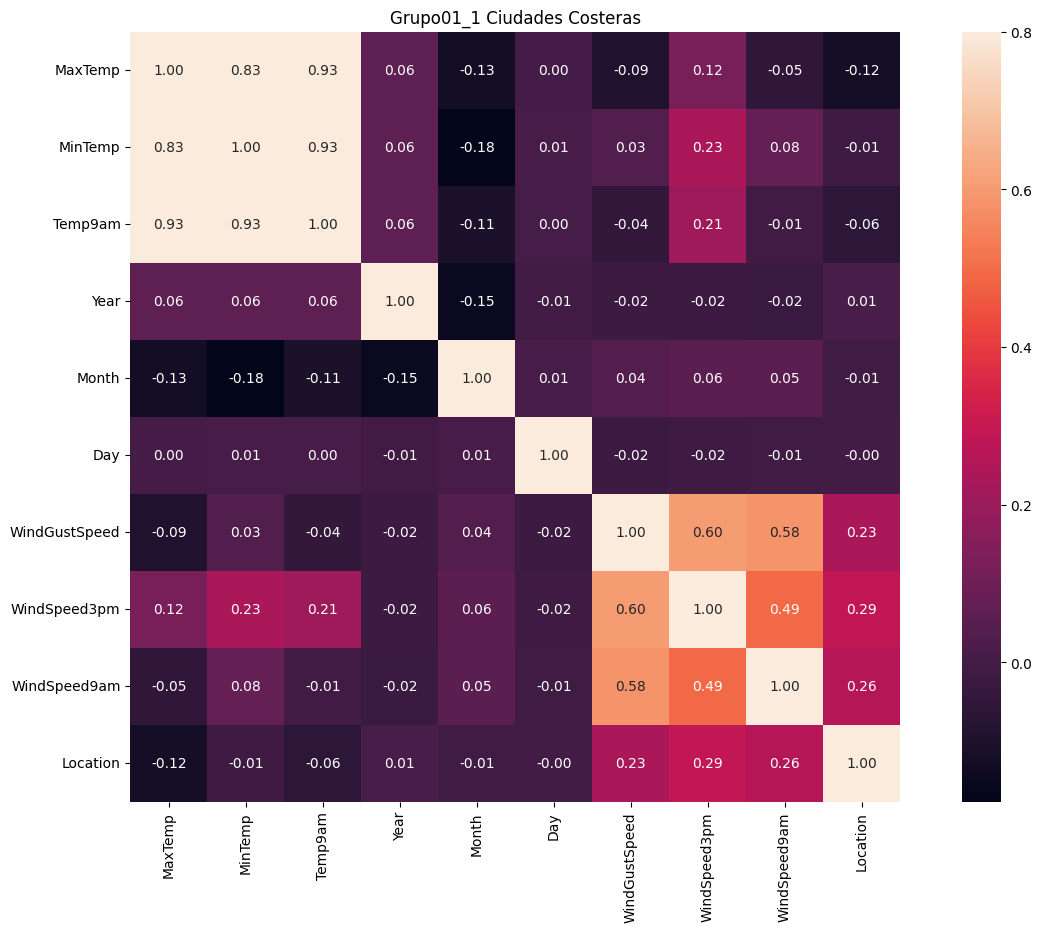

In [15]:

grupo01_1 = grupo01.copy()
grupo01_1['Date']  = pd.to_datetime(df['Date'])
grupo01_1['Year'] = grupo01['Date'].dt.year
grupo01_1['Month'] = grupo01['Date'].dt.month
grupo01_1['Day'] = grupo01['Date'].dt.day

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
grupo01_1['Location'] = le.fit_transform(grupo01_1['Location'])


conjunto_de_datos_para_primer_modelo = grupo01_1[['MaxTemp','MinTemp','Temp9am', 'Year','Month','Day','WindGustSpeed','WindSpeed3pm','WindSpeed9am', 'Location']]

# matriz de correlación

import seaborn as sns
corrmat = conjunto_de_datos_para_primer_modelo.corr()
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f');
plt.title("Grupo01_1 Ciudades Costeras")
plt.show()










In [16]:

conjunto_de_datos_para_primer_modelo.describe()

,MaxTemp,MinTemp,Temp9am,Year,Month,Day,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Location
count,28152.000000,28139.000000,28131.000000,28165.000000,28165.000000,28165.000000,26977.000000,28109.000000,28104.000000,28165.000000
mean,25.330477,16.142066,20.449536,2012.548695,6.478431,15.715604,39.010490,18.732292,13.505302,3.995988
std,6.239328,6.079395,6.319505,2.627980,3.429459,8.792609,13.003427,8.063993,7.648887,2.560159
min,7.200000,-0.600000,1.100000,2008.000000,1.000000,1.000000,9.000000,0.000000,0.000000,0.000000
25%,20.500000,11.400000,15.400000,2010.000000,3.000000,8.000000,30.000000,13.000000,7.000000,2.000000
50%,25.900000,16.300000,20.900000,2013.000000,6.000000,16.000000,37.000000,19.000000,13.000000,4.000000
75%,30.500000,21.100000,25.800000,2015.000000,9.000000,23.000000,46.000000,24.000000,19.000000,6.000000
max,45.800000,33.900000,39.000000,2017.000000,12.000000,31.000000,135.000000,72.000000,87.000000,8.000000


In [17]:
# conjunto_de_datos_para_primer_modelo.info()

conjunto_de_datos_para_primer_modelo['Day'] = conjunto_de_datos_para_primer_modelo['Day'].astype("category")
conjunto_de_datos_para_primer_modelo['Month'] = conjunto_de_datos_para_primer_modelo['Month'].astype("category")
conjunto_de_datos_para_primer_modelo['Year'] = conjunto_de_datos_para_primer_modelo['Year'].astype("category")

conjunto_de_datos_para_primer_modelo.info()
## tenemos que transformar a to_categorical


<class 'pandas.core.frame.DataFrame'>
Index: 28165 entries, 29497 to 139112
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MaxTemp        28152 non-null  float64 
 1   MinTemp        28139 non-null  float64 
 2   Temp9am        28131 non-null  float64 
 3   Year           28165 non-null  category
 4   Month          28165 non-null  category
 5   Day            28165 non-null  category
 6   WindGustSpeed  26977 non-null  float64 
 7   WindSpeed3pm   28109 non-null  float64 
 8   WindSpeed9am   28104 non-null  float64 
 9   Location       28165 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 1.8 MB


<ipython-input-17-58b22825cfb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conjunto_de_datos_para_primer_modelo['Day'] = conjunto_de_datos_para_primer_modelo['Day'].astype("category")
<ipython-input-17-58b22825cfb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conjunto_de_datos_para_primer_modelo['Month'] = conjunto_de_datos_para_primer_modelo['Month'].astype("category")
<ipython-input-17-58b22825cfb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [18]:
# randomm forest parte 1

conjunto_de_datos_para_primer_modelo = conjunto_de_datos_para_primer_modelo.dropna()

X = conjunto_de_datos_para_primer_modelo.drop(['Location'], axis=1)

y = conjunto_de_datos_para_primer_modelo['Location']

from sklearn.preprocessing import StandardScaler
stscaler= StandardScaler()
# standardization
X_scale = stscaler.fit_transform(X)
#print(scale)

# split data into training and testing sets

from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.33, random_state = 42)




In [19]:
# random forest parte 2
# check the shape of X_train and X_test

X_train.shape, X_test.shape



((18020, 9), (8877, 9))

In [20]:
# random forest parte 3

# check data types in X_train

#X_train.dtypes

#X_train.head()



In [21]:

conjunto_de_datos_para_primer_modelo.isnull().sum()


MaxTemp          0
MinTemp          0
Temp9am          0
Year             0
Month            0
Day              0
WindGustSpeed    0
WindSpeed3pm     0
WindSpeed9am     0
Location         0
dtype: int64

In [22]:
# importar Random Forest

from sklearn.ensemble import RandomForestClassifier


# inicializar el clasificador
## revisar los hiperparametros
## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
##
## aplicar cross validation
##########
rfc = RandomForestClassifier(random_state=0, criterion='entropy')

# entrenar el modelo
rfc.fit(X_train, y_train)

# predecir el conjunto de x test
y_pred = rfc.predict(X_test)


# revisar la precisión del modelo
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# 0.68 sin scaler


Model accuracy score with 10 decision-trees : 0.6876


In [23]:


# suport vector machine clasifier
# https://scikit-learn.org/stable/api/sklearn.svm.html#module-sklearn.svm
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3,random_state=109) # 70% training and 30% test


#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# 0.50 sin scaler





Accuracy: 0.5126732004055424


In [ ]:
# Importar GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros a probar
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Crear un objeto de GridSearchCV
grid_search = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=5)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo objeto de SVM con los mejores hiperparámetros
clf = svm.SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])

# Entrenar el modelo con los mejores hiperparámetros
clf.fit(X_train, y_train)

# Predecir el conjunto de x_test
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
print("Precisión: ", metrics.accuracy_score(y_test, y_pred))


In [25]:
##
##
##

##
# https://epistasislab.github.io/tpot/
##




### 2.11 - Grafico de dispersión + histograma

<p><small>Aqui observamos la dispersion de los datos que utilizaremos para nuestro análisis preliminar. Podemos observar que estan bien concentrados en dirección a la media</small></p>

<p><small><b>WindSpeed9am</b> & <b>WindGustSpeed</b></small></p>


In [ ]:
#sns.jointplot(x=df['WindSpeed9am'], y=df['WindGustSpeed'])

<p><small><b>WindSpeed3pm</b> & <b>WindGustSpeed</b></small></p>

In [ ]:
#sns.jointplot(x=df['WindSpeed3pm'], y=df['WindGustSpeed'])

<p><small>Observamos una mejor dispersion de los datos(curva mas normal)</small></p>

In [ ]:
#plt.hist(df['WindSpeed3pm'], bins=range(0, 100), align='left', rwidth=0.8)  # Asumo que la edad puede variar entre 0 y 100 años
#plt.xlabel('WindSpeed3pm')
#plt.ylabel('WindSpeed3pm')
#plt.title('Distribución de WindSpeed3pm')
#plt.show()

In [ ]:
#dfboxplot.drop(dfboxplot.query('WindSpeed3pm >40').index,inplace=True)

In [ ]:
#plt.hist(dfboxplot['WindSpeed3pm'], bins=range(0, 50), align='left', rwidth=0.8)  # Asumo que la edad puede variar entre 0 y 100 años
#plt.xlabel('WindSpeed3pm')
#plt.ylabel('WindSpeed3pm')
#plt.title('Distribución de WindSpeed3pm')
#plt.show()

In [ ]:


# utilizamos boxplot para verificar outliers en el atributo WindSpeed9am: podemos ver que
# existen muchos registros con WindSpeed9am superior a ???

#plt.boxplot(list(dfboxplot['WindSpeed9am']))
#plt.show()




In [ ]:
#plt.boxplot(list(dfboxplot['WindSpeed3pm']))
#plt.show()

In [ ]:
#plt.boxplot(list(dfboxplot['WindGustSpeed']))
#plt.show()

In [ ]:
#import seaborn as sns

#sns.set_style('whitegrid')
#ax= sns.boxplot(x='WindSpeed3pm',y='WindGustSpeed',data=dfboxplot)
## Rotate x-axis labels to 45 degrees
#plt.xticks(rotation=45)
#plt.show()

In [ ]:
#sns.set_style('whitegrid')
#ax = sns.boxplot(x='WindSpeed3pm', y='WindGustSpeed', data=dfboxplot)

## Rotate x-axis labels to 45 degrees
#plt.xticks(rotation=45)

# Adjust layout for better spacing if needed
#plt.tight_layout()
#plt.show()

Para la fase de preparacion de datos consideraremos las siguients etapas:

- Seleccion de datos: Seleccionar los datos relevante para el analisis descartando aquellos que no son necesarios para el objetivo comercial
- Limpieza: Identificar y corregir errores, valores atipicos y datos faltantes
- Integracion de los datos: Integrar datos de multiples fuentesl, resolver discrepancia en la estructura y formato de datos.
- Transformacion de los datos: Aplicar transformaciones con normalizacion, Crear nuevas caracteristicas para mejorar la calidad y codificar varibles categoricas.
- Division de los datos: Dividir el conjunto de entrenamiento, validacion y prueba


Variable escogida(windspeed3pm). Esta caracteristica nos permitira analizar las condiciones climaticas ideales para realizar deportes de viento en algunas cuidades de Australia.

In [ ]:
## hasta acá es la evaluación 01




Comentarios de criterio
Aunque proporcionan un buen contexto y discusión general sobre la importancia de los datos y la metodología CRISP-DM, no identifican de manera explícita los objetivos clave o KPIs que se espera alcanzar con el proyecto. Esto es crucial en la fase de Comprensión del Negocio, donde se deben establecer claramente estos elementos para guiar el desarrollo y evaluación del proyecto.



Aunque el documento discute la metodología y el análisis de datos, no identifica claramente los objetivos clave ni los KPIs en la fase de Comprensión del Negocio, lo cual es esencial para alinear el proyecto con las necesidades empresariales.



El documento establece un buen contexto y justificación para el análisis de datos relacionado con los fenómenos climáticos en Australia, pero no especifica los objetivos ni los KPIs, lo cual es crucial para la fase de Comprensión del Negocio y para guiar el análisis y las decisiones basadas en datos.







## 3 - Preparación de los datos

In [ ]:

# crear dataset para la etapa de preparación
dfx.columns


In [ ]:

dfx.info()



In [ ]:
# revisar distribución




In [ ]:

# verificar la cantida de registros y los nulos

print("cantidad de registros para la clase WindSpeed9am" , dfx['WindSpeed9am'].count() , "cantidad de nulos", dfx['WindSpeed9am'].isnull().sum(), " la media es" , dfx['WindSpeed9am'].mean())


In [ ]:

print("cantidad de registros para la clase WindGustSpeed" , dfx['WindGustSpeed'].count() , "cantidad de nulos", dfx['WindGustSpeed'].isnull().sum(), " la media es" , dfx['WindGustSpeed'].mean())


In [ ]:

# imputar nulos usando la media

mean_value = dfx['WindSpeed9am'].mean()
dfx['WindSpeed9am']= dfx['WindSpeed9am'].fillna(mean_value)
#
mean_value = dfx['WindSpeed9am'].mean()
dfx['WindGustSpeed']= dfx['WindGustSpeed'].fillna(mean_value)




In [ ]:
# reducir la dimensionalidad de la columna

from sklearn.decomposition import PCA
import pandas as pd

# Assuming `panda_df` is your DataFrame and it has a column named `column_to_reduce`
pca = PCA(n_components=1) # Reduce to 1 dimension for example
dfx['pca_column_WindSpeed9am'] = pca.fit_transform(dfx[['WindSpeed9am']])
dfx['pca_column_WindGustSpeed'] = pca.fit_transform(dfx[['WindGustSpeed']])



In [ ]:

# graficamos para verificar la reducción de dimensionalidad


sns.jointplot(x=dfx['pca_column_WindSpeed9am'], y=dfx['pca_column_WindGustSpeed'])




In [ ]:
dfx.head()

In [ ]:

# reducir la variabilidad


from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `panda_df` is your DataFrame and `column_to_reduce` is the column you want to standardize
scaler = StandardScaler()
dfx['pca_column_WindSpeed9am'] = scaler.fit_transform(dfx[['pca_column_WindSpeed9am']])

dfx['pca_column_WindGustSpeed'] = scaler.fit_transform(dfx[['pca_column_WindGustSpeed']])




In [ ]:
sns.jointplot(x=dfx['pca_column_WindSpeed9am'], y=dfx['pca_column_WindGustSpeed'])





In [ ]:
dfx.head()

In [ ]:


sns.boxplot(x=dfx['pca_column_WindSpeed9am'])
plt.show()



In [ ]:
sns.boxplot(x=dfx['pca_column_WindGustSpeed'])
plt.show()




In [ ]:
# 20 de mayo del 2024

df.head()









In [ ]:
# transformar a fecha para poder explorar


df.Date = pd.to_datetime(df.Date)

df.groupby(df["Date"].dt.year).count()

# encontramos que los años con menos registros son

# 2007 : 61 registros
# 2008 : 2246 registros
# 2017 : 8466 registros
#
# estos años serán descartados para etapa de preparación de datos



In [ ]:
# revisaremos la distribución de datos en los meses

df.groupby(df["Date"].dt.month).count()




In [ ]:
# revisaremos la distribución de datos en los días

df.groupby(df["Date"].dt.day).count()


## 4 - Modelado de los datos

In [ ]:


# hasta aca la evaluación 02
# entrega 22/05


## 5 - Evaluación de los modelos

## 6 - Despliegue